<a href="https://colab.research.google.com/github/masaki0914/data_analysis_100knocks/blob/main/%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90100%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF_%E7%AC%AC3%E7%AB%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3章 顧客の全体像を把握する１０本ノック

##データを読み込む

In [1]:
# 警告(worning)の非表示化
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
uselog = pd.read_csv("use_log.csv")
print(len(uselog))
uselog.head()

58254


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [4]:
customer = pd.read_csv("customer_master.csv")
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [5]:
class_master = pd.read_csv('class_master.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [6]:
campaign_master = pd.read_csv('campaign_master.csv')
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


##顧客データを整形

In [7]:
customer_join = pd.merge(customer, class_master, on="class", how="left")
customer_join = pd.merge(customer_join, campaign_master, on="campaign_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


In [8]:
print(len(customer))
print(len(customer_join))

4192
4192


In [9]:
customer_join.isnull().sum()

,0
customer_id,0
name,0
class,0
gender,0
start_date,0
end_date,2842
campaign_id,0
is_deleted,0
class_name,0
price,0


##顧客データの基礎集計

In [10]:
customer_join.groupby("class_name").count()["customer_id"]

,customer_id
class_name,
オールタイム,2045
デイタイム,1019
ナイト,1128


In [11]:
customer_join.groupby("campaign_name").count()["customer_id"]

,customer_id
campaign_name,
入会費半額,650
入会費無料,492
通常,3050


In [12]:
customer_join.groupby("gender").count()["customer_id"]

,customer_id
gender,
F,1983
M,2209


In [13]:
customer_join.groupby("is_deleted").count()["customer_id"]

,customer_id
is_deleted,
0,2842
1,1350


In [14]:
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])
customer_start = customer_join.loc[customer_join["start_date"]>pd.to_datetime("20180401")]
print(len(customer_start))

1361


##最新顧客データの基礎集計

In [15]:
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])
customer_newer = customer_join.loc[(customer_join["end_date"]>=pd.to_datetime("20190331"))|(customer_join["end_date"].isna())]
print(len(customer_newer))
customer_newer["end_date"].unique()

2953


<DatetimeArray>
['NaT', '2019-03-31 00:00:00']
Length: 2, dtype: datetime64[ns]

In [16]:
customer_newer.groupby("class_name").count()["customer_id"]

,customer_id
class_name,
オールタイム,1444
デイタイム,696
ナイト,813


In [17]:
customer_newer.groupby("campaign_name").count()["customer_id"]

,customer_id
campaign_name,
入会費半額,311
入会費無料,242
通常,2400


In [18]:
customer_newer.groupby("gender").count()["customer_id"]

,customer_id
gender,
F,1400
M,1553


##利用履歴データを集計

In [19]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["年月"] = uselog["usedate"].dt.strftime("%Y%m")
uselog_months = uselog.groupby(["年月","customer_id"],as_index=False).count()
uselog_months.rename(columns={"log_id":"count"}, inplace=True)
del uselog_months["usedate"]
uselog_months.head()

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [22]:
uselog_customer = uselog_months.groupby("customer_id")["count"].agg(["mean", "median", "max", "min"])
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.0,4.5,5,2
1,AS008805,6.0,6.0,8,4
2,AS009013,2.0,2.0,2,2
3,AS009373,3.5,3.5,4,3
4,AS015233,6.0,7.0,7,4


##利用履歴データから定期利用フラグを作成

In [23]:
uselog["weekday"] = uselog["usedate"].dt.weekday
uselog_weekday = uselog.groupby(["customer_id","年月","weekday"], as_index=False).count()[["customer_id","年月","weekday","log_id"]]
uselog_weekday.rename(columns={"log_id":"count"}, inplace=True)
uselog_weekday.head()

,customer_id,年月,weekday,count
0,AS002855,201804,5.0,4
1,AS002855,201805,2.0,1
2,AS002855,201805,5.0,4
3,AS002855,201806,5.0,5
4,AS002855,201807,5.0,2


In [24]:
uselog_weekday = uselog_weekday.groupby("customer_id",as_index=False).max()[["customer_id", "count"]]
uselog_weekday["routine_flag"] = 0
uselog_weekday["routine_flag"] = uselog_weekday["routine_flag"].where(uselog_weekday["count"]<4, 1)
uselog_weekday.head()

,customer_id,count,routine_flag
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,4,1
4,AS015233,3,0


##顧客データと利用履歴データを結合

In [25]:
customer_join = pd.merge(customer_join, uselog_customer, on="customer_id", how="left")
customer_join = pd.merge(customer_join, uselog_weekday[["customer_id", "routine_flag"]], on="customer_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flag
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.50,4.0,8.0,2.0,1.0
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.25,6.0,7.0,2.0,1.0
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,3.75,4.0,5.0,2.0,1.0
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.75,5.0,7.0,2.0,1.0
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.50,3.5,6.0,1.0,1.0


In [26]:
customer_join.isnull().sum()

,0
customer_id,0
name,0
class,0
gender,0
start_date,0
end_date,2842
campaign_id,0
is_deleted,0
class_name,0
price,0


##会員期間を計算

In [27]:
from dateutil.relativedelta import relativedelta
customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))
customer_join["membership_period"] = 0
for i in range(len(customer_join)):
  delta = relativedelta(customer_join["calc_date"].iloc[i], customer_join["start_date"].iloc[i])
  customer_join["membership_period"].iloc[i] = delta.years*12 + delta.months
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flag,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.50,4.0,8.0,2.0,1.0,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.25,6.0,7.0,2.0,1.0,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,3.75,4.0,5.0,2.0,1.0,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.75,5.0,7.0,2.0,1.0,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.50,3.5,6.0,1.0,1.0,2019-04-30,47


##顧客行動の各種統計量

In [29]:
customer_join[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,3474.000000,3474.000000,3474.000000,3474.000000
mean,4.677365,4.788428,6.632124,2.513529
std,1.521180,1.750036,2.247298,1.195281
min,1.000000,1.000000,1.000000,1.000000
25%,3.750000,3.500000,5.000000,2.000000
50%,4.750000,4.500000,7.000000,2.000000
75%,5.750000,6.000000,8.000000,3.000000
max,12.000000,12.000000,14.000000,12.000000


In [30]:
customer_join.groupby("routine_flag").count()["customer_id"]

,customer_id
routine_flag,
0.0,969
1.0,2505


(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

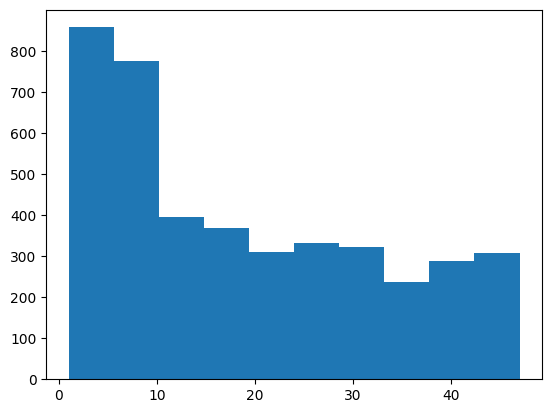

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(customer_join["membership_period"])

##退会ユーザーと継続ユーザーの違いを把握

In [32]:
customer_end = customer_join.loc[customer_join["is_deleted"]==1]
customer_end.describe()

,start_date,end_date,is_deleted,price,mean,median,max,min,routine_flag,calc_date,membership_period
count,1350,1350,1350.0,1350.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1350,1350.000000
mean,2018-01-20 10:45:20,2018-10-17 16:23:28,1.0,8595.555556,4.020051,4.052901,5.735495,2.244027,0.302901,2018-10-17 16:23:28,8.026667
min,2016-05-01 00:00:00,2018-04-30 00:00:00,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2018-04-30 00:00:00,1.000000
25%,2017-10-01 00:00:00,2018-06-30 00:00:00,1.0,6000.000000,2.750000,2.500000,4.000000,1.000000,0.000000,2018-06-30 00:00:00,4.000000
50%,2018-03-01 00:00:00,2018-10-31 00:00:00,1.0,7500.000000,4.000000,4.000000,6.000000,2.000000,0.000000,2018-10-31 00:00:00,7.000000
75%,2018-06-03 00:00:00,2019-01-31 00:00:00,1.0,10500.000000,5.333333,5.500000,8.000000,3.000000,1.000000,2019-01-31 00:00:00,11.000000
max,2019-02-11 00:00:00,2019-03-31 00:00:00,1.0,10500.000000,12.000000,12.000000,12.000000,12.000000,1.000000,2019-03-31 00:00:00,23.000000
std,NaN,NaN,0.0,1949.163652,1.662880,1.848377,2.617683,1.307604,0.459709,NaN,5.033692


In [33]:
customer_stay = customer_join.loc[customer_join["is_deleted"]==0]
customer_stay.describe()

,start_date,end_date,is_deleted,price,mean,median,max,min,routine_flag,calc_date,membership_period
count,2842,0,2842.0,2842.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2842,2842.000000
mean,2017-04-03 22:42:28.627726848,NaT,0.0,8542.927516,5.012019,5.162902,7.088619,2.650738,0.933970,2019-04-30 00:00:00,23.970443
min,2015-05-01 00:00:00,NaT,0.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2019-04-30 00:00:00,1.000000
25%,2016-05-01 00:00:00,NaT,0.0,6000.000000,4.000000,4.000000,6.000000,2.000000,1.000000,2019-04-30 00:00:00,12.000000
50%,2017-04-01 00:00:00,NaT,0.0,7500.000000,5.000000,5.000000,7.000000,3.000000,1.000000,2019-04-30 00:00:00,24.000000
75%,2018-04-05 00:00:00,NaT,0.0,10500.000000,6.000000,6.000000,8.000000,3.000000,1.000000,2019-04-30 00:00:00,35.000000
max,2019-03-15 00:00:00,NaT,0.0,10500.000000,9.000000,10.000000,14.000000,8.000000,1.000000,2019-04-30 00:00:00,47.000000
std,NaN,NaN,0.0,1977.189779,1.324112,1.570993,1.875518,1.109242,0.248388,NaN,13.746761


In [34]:
customer_join.to_csv("customer_join.csv", index=False)